# Problem Statement:
### Prediction of a customer to purchase from an e-commerce website.


In [1]:
# Import basic libraries for data analysis and plotting

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# ML model libraries

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df=pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [5]:
df.isnull().any().any()

False

In [6]:
#Converting the duration to minutes

df['Admin_Duration']=df['Administrative_Duration']/60
df['Inform_Duration']=df['Informational_Duration']/60
df['Prod_Duration']=df['ProductRelated_Duration']/60
df.drop(['Administrative_Duration','Informational_Duration','ProductRelated_Duration'],axis=1,inplace=True)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000
OperatingSystems,12330.0,2.124006,0.911325,1.0,2.000000,2.000000,3.000000,8.000000
Browser,12330.0,2.357097,1.717277,1.0,2.000000,2.000000,2.000000,13.000000
Region,12330.0,3.147364,2.401591,1.0,1.000000,3.000000,4.000000,9.000000


* Administrative categorical data ranging from 0 to 27
* Informational categorical data ranging from 0 to 24
* ProductRelated categorical data ranging from 0 to 705
* specialDay categorical data ranging from 0 to 1 (0, 0.2, 0.4, 0.6, 0.8, 1)
* OperatingSystem categorical data ranging from 1 to 8
* Browser categorical data ranging from 1 to 13
* Region categorical data ranging from 1 to 9
* TrafficType categorical data ranging from 0 to 20
* No missing values


### Data Visualization

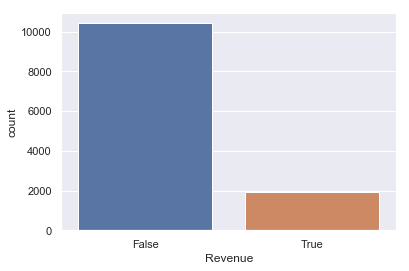

In [8]:
sns.countplot(df['Revenue'])  # Data imbalance in the target feature observed. 

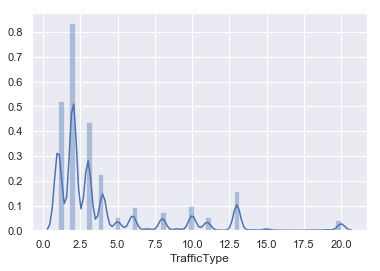

In [9]:
sns.distplot(df['TrafficType'])  # Traffic Type 2 results to maximum visits followed by 1 and 3

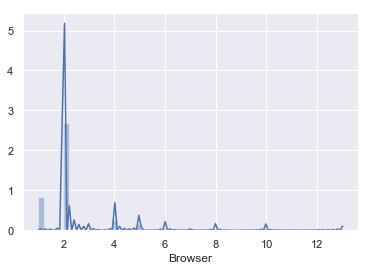

In [10]:
sns.distplot(df['Browser']) # most of the users use browser 2

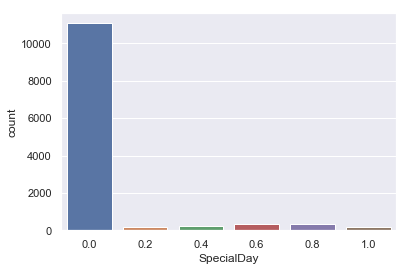

In [11]:
sns.countplot(df['SpecialDay']) # Special days are not contributing to any increased user traffic...

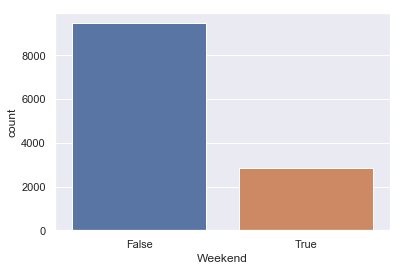

In [12]:
sns.countplot(df['Weekend']) # most of the visitor traffic is on weekdays 

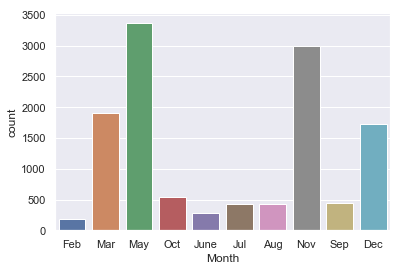

In [13]:
sns.countplot(df['Month']) # Visits are maximum during May and Nov... 

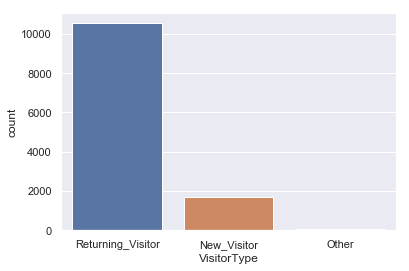

In [14]:
sns.countplot(df['VisitorType']) # Most of the users are Returning visitors

* Univariate Analysis provides some insight on the user traffic visiting the website. User behaviour Analysis described as below.
* Since special days are not attracting much users, the discounts or promotions on special events may not be attractive/relevant 
* Also lesser traffic on weekends compared to weekdays indicate visitors interested in hedonic browsing or shallow browsing 
* The traffic is also high during May and Nov generally a holiday season... 
* Most of the visitors are returning visitors could indicate customers being happy with the services 

In [15]:
#Encoding the non-numeric categorical variables into numeric codes

from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
df['Month']=number.fit_transform(df['Month'].astype('str'))
visitor=LabelEncoder()
df['VisitorType']=visitor.fit_transform(df['VisitorType'].astype('str'))
purchase=LabelEncoder()
df['Revenue']=purchase.fit_transform(df['Revenue'].astype('str'))
weekend=LabelEncoder()
df['Weekend']=weekend.fit_transform(df['Weekend'].astype('str'))

### Correlation of features

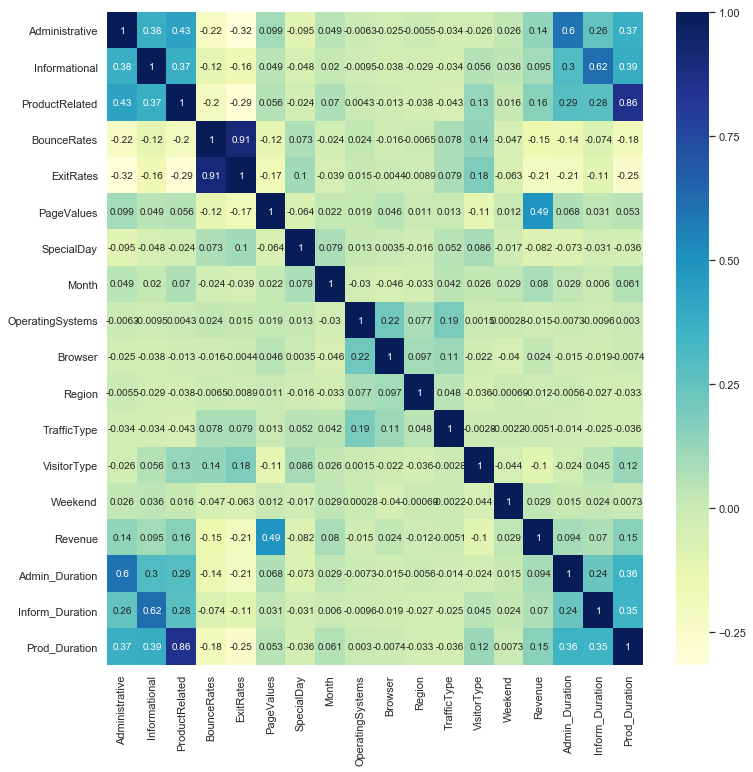

In [16]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu",)

### Bi-Variate Analysis through Pairplot

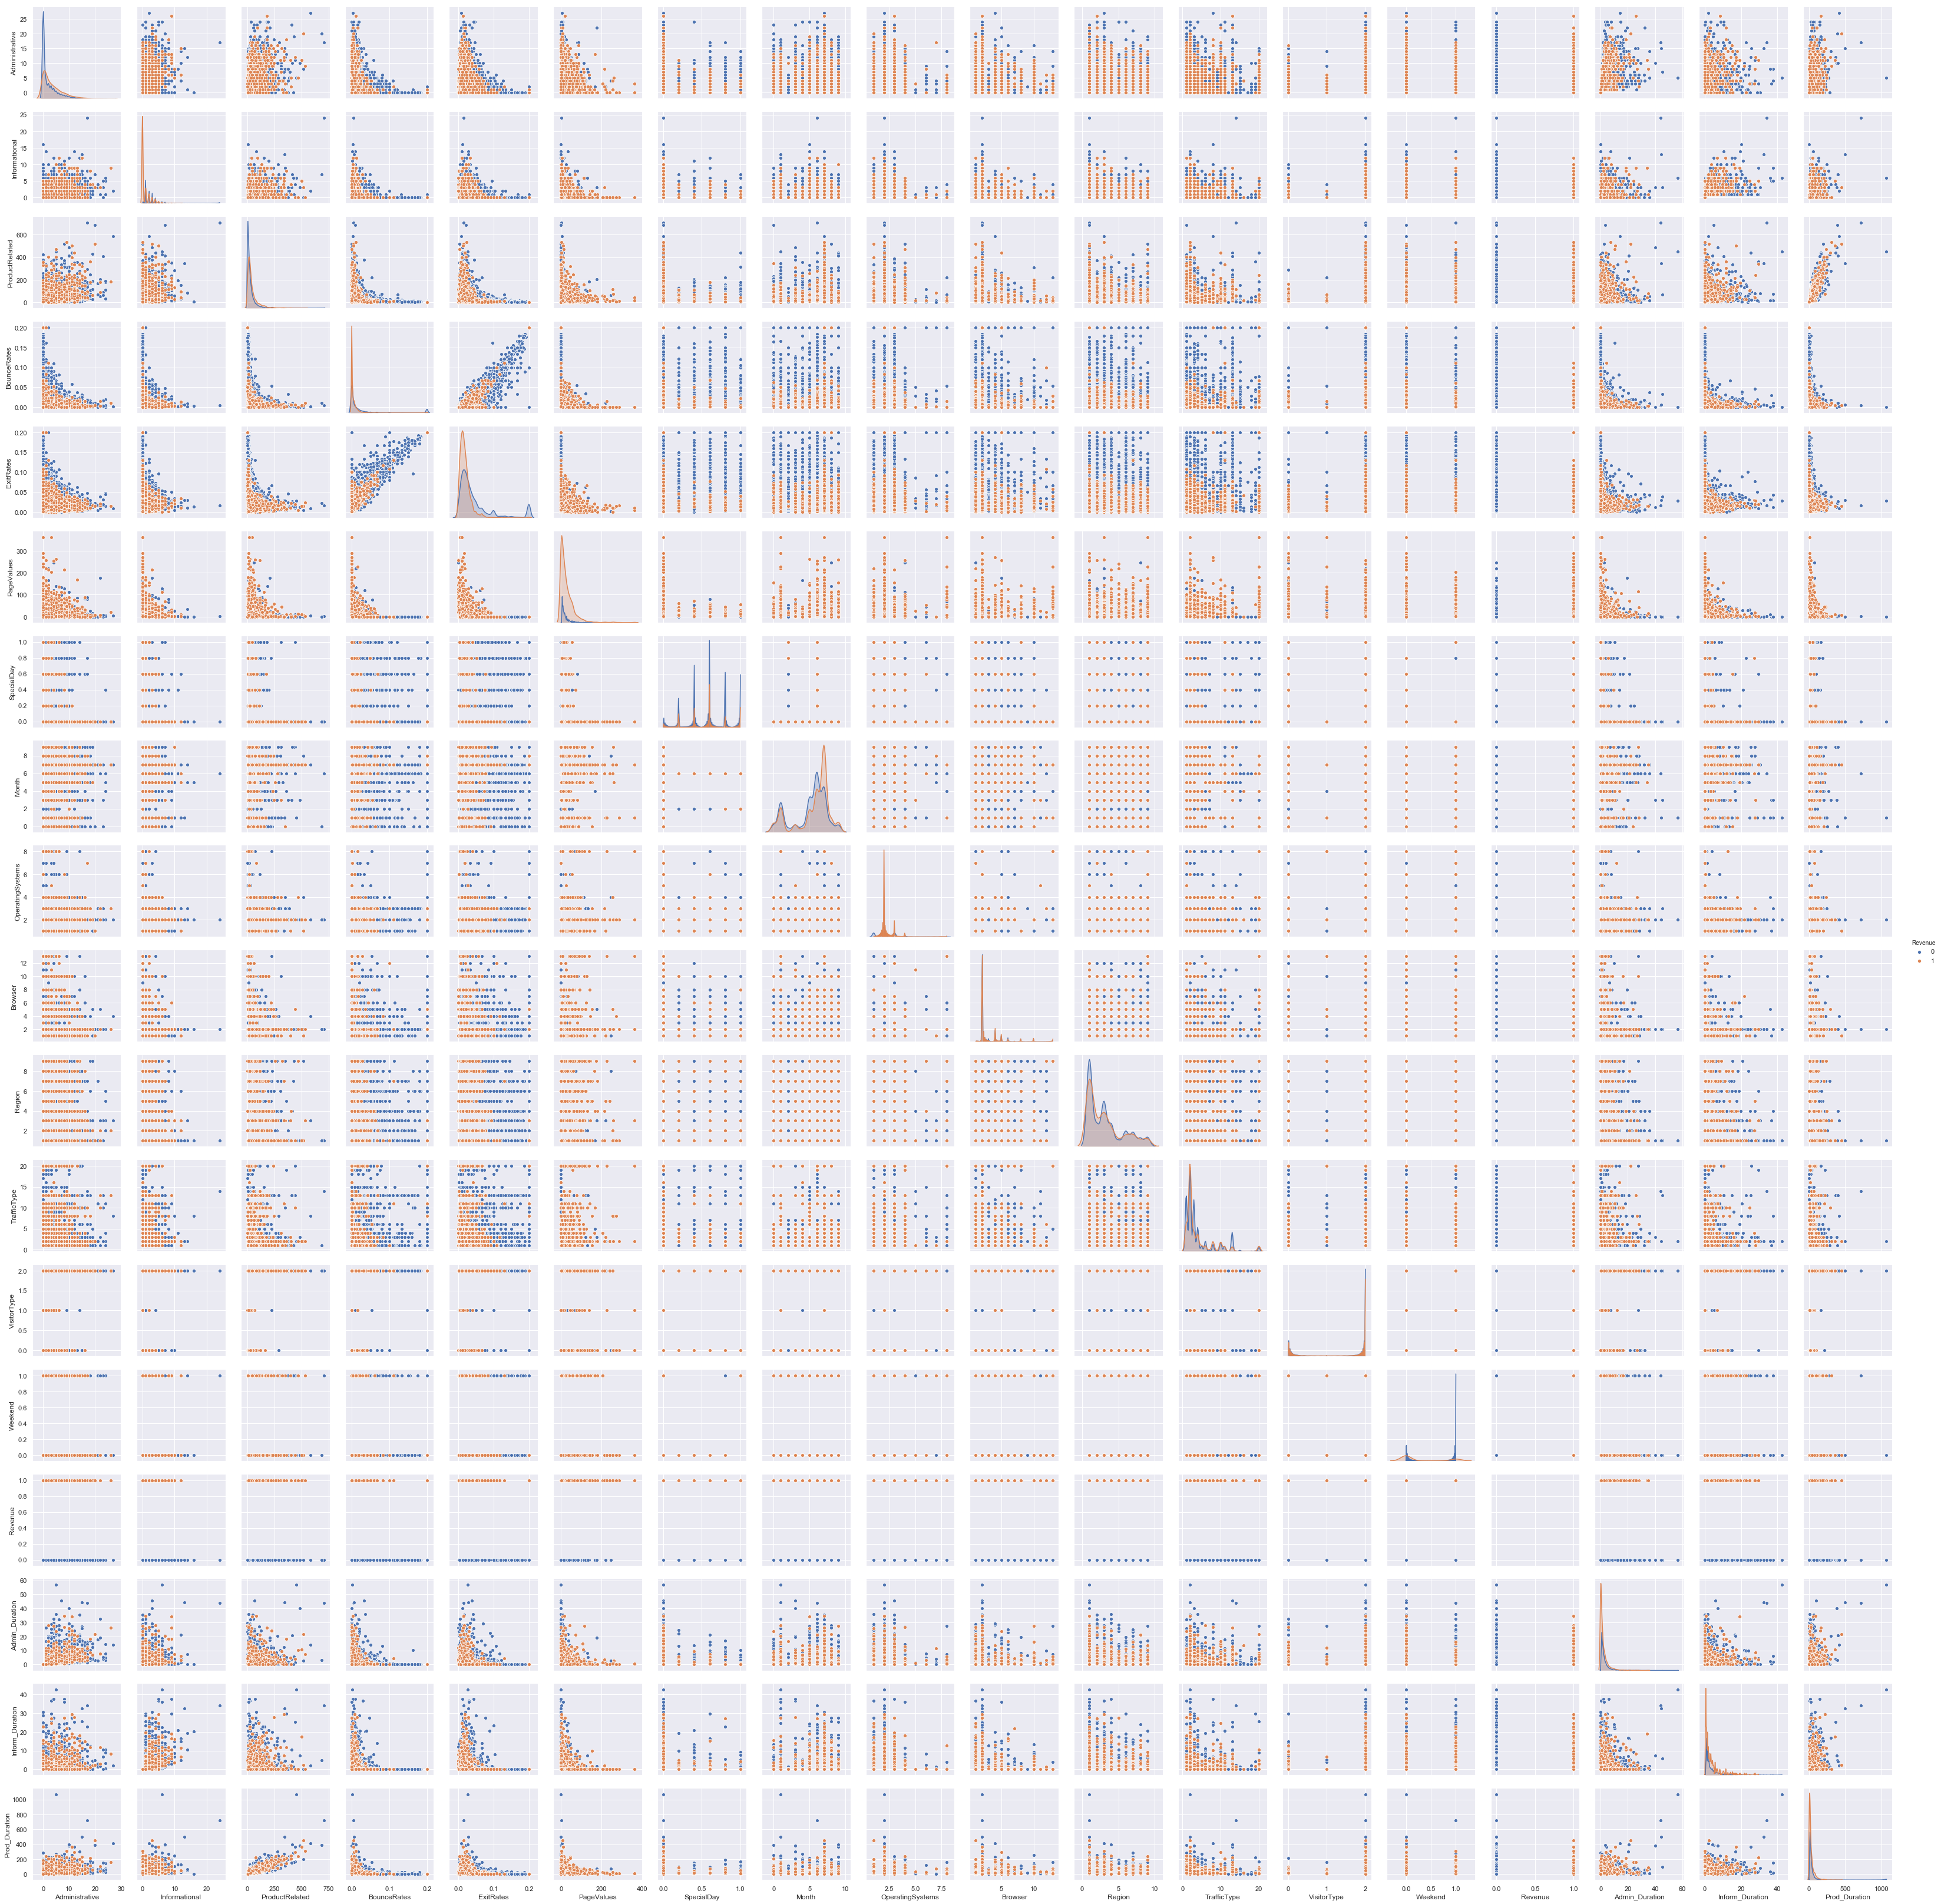

In [17]:
sns.pairplot(df, hue='Revenue',diag_kind='kde')

* Pairplot and heatmap shows strong positive correlation between Exit and Bounce Rates. Similarly, the Product duration and Product related pages have a strong correlation.
* Page value has a significant correlation with the Revenue feature ( very important predictor whether a sale will happen or not)
* Data along the diagonal indicates skewness of data.
* Overalapping gaussians indicate the possibility of clustering.

### Separate the dependent and Independent variables. 
### Split the Training and Test sets.

In [18]:
X=df.drop('Revenue',axis=1)
y=df['Revenue']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
y_train.value_counts()

0    7267
1    1364
Name: Revenue, dtype: int64

### Upsampling the training set

In [20]:
from collections import Counter
print('Original dataset shape %s' % Counter(y_train))
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=100)
X_over, y_over = sm.fit_sample(X_train, y_train)
print('After Upsampling dataset shape %s' % Counter(y_over))

Original dataset shape Counter({0: 7267, 1: 1364})
After Upsampling dataset shape Counter({1: 7267, 0: 7267})


### Compare results between the original training set and upsampled set 

In [21]:
# Compare results without scaling and feature selection
resultsDf = pd.DataFrame(index=['Logistic Regression', 'Naive Bayes', 'KNN', 'SVC', 
                                'AdaBoost', 'GradientBoost', 'RandomForest'])


In [22]:
# logistic Regression
LRmodel = LogisticRegression()
LRmodel.fit(X_train,y_train)
predicted=LRmodel.predict(X_test)
print(metrics.classification_report(y_test, predicted))
print("Confusion Matrix of Original set: \n",metrics.confusion_matrix(y_test, predicted))
print("\n Accuracy:", metrics.accuracy_score(predicted,y_test))

LRmodel.fit(X_over,y_over)
predicted=LRmodel.predict(X_test)
print(metrics.classification_report(y_test, predicted))
print("\n Confusion Matrix of Upsampled set: \n",metrics.confusion_matrix(y_test, predicted))
print("\n Accuracy:", metrics.accuracy_score(predicted,y_test))


              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3155
           1       0.74      0.36      0.48       544

   micro avg       0.89      0.89      0.89      3699
   macro avg       0.82      0.67      0.71      3699
weighted avg       0.87      0.89      0.87      3699

Confusion Matrix of Original set: 
 [[3087   68]
 [ 350  194]]

 Accuracy: 0.8869964855366316
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      3155
           1       0.53      0.71      0.61       544

   micro avg       0.86      0.86      0.86      3699
   macro avg       0.74      0.80      0.76      3699
weighted avg       0.89      0.86      0.87      3699


 Confusion Matrix of Upsampled set: 
 [[2813  342]
 [ 158  386]]

 Accuracy: 0.8648283319816167


In [23]:
# Naive Bayes model
NBmodel = GaussianNB()
NBmodel.fit(X_train, y_train)
predicted = NBmodel.predict(X_test)
print(metrics.classification_report(y_test, predicted))
print("Confusion Matrix of Original set: \n",metrics.confusion_matrix(y_test, predicted))
print("\n Accuracy:", metrics.accuracy_score(predicted,y_test))


NBmodel.fit(X_over, y_over)
predicted = NBmodel.predict(X_test)
print(metrics.classification_report(y_test, predicted))
print("\n Confusion Matrix of Upsampled set: \n",metrics.confusion_matrix(y_test, predicted))
print("\n Accuracy:", metrics.accuracy_score(predicted,y_test))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88      3155
           1       0.40      0.64      0.49       544

   micro avg       0.80      0.80      0.80      3699
   macro avg       0.66      0.73      0.68      3699
weighted avg       0.85      0.80      0.82      3699

Confusion Matrix of Original set: 
 [[2629  526]
 [ 198  346]]

 Accuracy: 0.804271424709381
              precision    recall  f1-score   support

           0       0.96      0.52      0.68      3155
           1       0.24      0.88      0.38       544

   micro avg       0.58      0.58      0.58      3699
   macro avg       0.60      0.70      0.53      3699
weighted avg       0.86      0.58      0.63      3699


 Confusion Matrix of Upsampled set: 
 [[1655 1500]
 [  67  477]]

 Accuracy: 0.5763719924303866


In [24]:
#KNN
KNNmodel = KNeighborsClassifier(n_neighbors= 5, weights = 'uniform', metric='euclidean')
KNNmodel.fit(X_train,y_train)
predicted=KNNmodel.predict(X_test)
print(metrics.classification_report(y_test, predicted))
print("Confusion Matrix of Original set: \n",metrics.confusion_matrix(y_test, predicted))
print("\n Accuracy:", metrics.accuracy_score(predicted,y_test))


KNNmodel.fit(X_over,y_over)
predicted=KNNmodel.predict(X_test)
print(metrics.classification_report(y_test, predicted))
print("\n Confusion Matrix of Upsampled set: \n",metrics.confusion_matrix(y_test, predicted))
print("\n Accuracy:", metrics.accuracy_score(predicted,y_test))


              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3155
           1       0.60      0.48      0.53       544

   micro avg       0.88      0.88      0.88      3699
   macro avg       0.76      0.71      0.73      3699
weighted avg       0.87      0.88      0.87      3699

Confusion Matrix of Original set: 
 [[2985  170]
 [ 284  260]]

 Accuracy: 0.8772641254393079
              precision    recall  f1-score   support

           0       0.94      0.82      0.88      3155
           1       0.40      0.71      0.51       544

   micro avg       0.80      0.80      0.80      3699
   macro avg       0.67      0.76      0.69      3699
weighted avg       0.86      0.80      0.82      3699


 Confusion Matrix of Upsampled set: 
 [[2578  577]
 [ 158  386]]

 Accuracy: 0.8012976480129764


In [25]:
# SVC

from sklearn.svm import SVC
svc = SVC(C=1, kernel='rbf')
svc.fit(X_train, y_train)
predicted=svc.predict(X_test)
print(metrics.classification_report(y_test, predicted))
print("Confusion Matrix of Original set: \n",metrics.confusion_matrix(y_test, predicted))
print("\n Accuracy:", metrics.accuracy_score(predicted,y_test))

svc.fit(X_over, y_over)
predicted=svc.predict(X_test)
print(metrics.classification_report(y_test, predicted))
print("\n Confusion Matrix of Upsampled set: \n",metrics.confusion_matrix(y_test, predicted))
print("\n Accuracy:", metrics.accuracy_score(predicted,y_test))


              precision    recall  f1-score   support

           0       0.86      0.99      0.92      3155
           1       0.67      0.10      0.17       544

   micro avg       0.86      0.86      0.86      3699
   macro avg       0.77      0.54      0.55      3699
weighted avg       0.84      0.86      0.81      3699

Confusion Matrix of Original set: 
 [[3129   26]
 [ 491   53]]

 Accuracy: 0.8602324952689916
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      3155
           1       0.50      0.30      0.37       544

   micro avg       0.85      0.85      0.85      3699
   macro avg       0.69      0.62      0.64      3699
weighted avg       0.83      0.85      0.84      3699


 Confusion Matrix of Upsampled set: 
 [[2989  166]
 [ 381  163]]

 Accuracy: 0.8521221951878886


In [26]:
#AdaBoost 

Adamodel = AdaBoostClassifier()
Adamodel.fit(X_train, y_train)
predicted=Adamodel.predict(X_test)
print(metrics.classification_report(y_test, predicted))
print("Confusion Matrix of Original set: \n",metrics.confusion_matrix(y_test, predicted))
print("\n Accuracy:", metrics.accuracy_score(predicted,y_test))



Adamodel.fit(X_over, y_over)
predicted=Adamodel.predict(X_test)
print(metrics.classification_report(y_test, predicted))
print("\n Confusion Matrix of Upsampled set: \n",metrics.confusion_matrix(y_test, predicted))
print("\n Accuracy:", metrics.accuracy_score(predicted,y_test))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3155
           1       0.64      0.56      0.60       544

   micro avg       0.89      0.89      0.89      3699
   macro avg       0.78      0.75      0.77      3699
weighted avg       0.88      0.89      0.89      3699

Confusion Matrix of Original set: 
 [[2985  170]
 [ 240  304]]

 Accuracy: 0.8891592322249257
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3155
           1       0.59      0.68      0.63       544

   micro avg       0.88      0.88      0.88      3699
   macro avg       0.77      0.80      0.78      3699
weighted avg       0.89      0.88      0.89      3699


 Confusion Matrix of Upsampled set: 
 [[2896  259]
 [ 173  371]]

 Accuracy: 0.8832116788321168


In [27]:
#Gradient Boost

gradmodel = GradientBoostingClassifier()
gradmodel.fit(X_train, y_train)
predicted=gradmodel.predict(X_test)
print(metrics.classification_report(y_test, predicted))
print("Confusion Matrix of Original set: \n",metrics.confusion_matrix(y_test, predicted))
print("\n Accuracy:", metrics.accuracy_score(predicted,y_test))


gradmodel.fit(X_over, y_over)
predicted=gradmodel.predict(X_test)
print(metrics.classification_report(y_test, predicted))
print("\n Confusion Matrix of Upsampled set: \n",metrics.confusion_matrix(y_test, predicted))
print("\n Accuracy:", metrics.accuracy_score(predicted,y_test))


              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3155
           1       0.68      0.59      0.64       544

   micro avg       0.90      0.90      0.90      3699
   macro avg       0.81      0.77      0.79      3699
weighted avg       0.90      0.90      0.90      3699

Confusion Matrix of Original set: 
 [[3006  149]
 [ 221  323]]

 Accuracy: 0.8999729656663963
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3155
           1       0.62      0.70      0.66       544

   micro avg       0.89      0.89      0.89      3699
   macro avg       0.78      0.81      0.80      3699
weighted avg       0.90      0.89      0.90      3699


 Confusion Matrix of Upsampled set: 
 [[2922  233]
 [ 162  382]]

 Accuracy: 0.8932143822654771


In [28]:
# Random Forest

rfcl = RandomForestClassifier()
rfcl = rfcl.fit(X_train, y_train)
predicted = rfcl.predict(X_test)
print(metrics.classification_report(y_test, predicted))
print("Confusion Matrix of Original set: \n",metrics.confusion_matrix(y_test, predicted))
print("\n Accuracy:", metrics.accuracy_score(predicted,y_test))

rfcl = rfcl.fit(X_over, y_over)
predicted = rfcl.predict(X_test)
print(metrics.classification_report(y_test, predicted))
print("\n Confusion Matrix of Upsampled set: \n",metrics.confusion_matrix(y_test, predicted))
print("\n Accuracy:", metrics.accuracy_score(predicted,y_test))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      3155
           1       0.72      0.51      0.60       544

   micro avg       0.90      0.90      0.90      3699
   macro avg       0.82      0.74      0.77      3699
weighted avg       0.89      0.90      0.89      3699

Confusion Matrix of Original set: 
 [[3047  108]
 [ 264  280]]

 Accuracy: 0.8994322789943228
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      3155
           1       0.63      0.61      0.62       544

   micro avg       0.89      0.89      0.89      3699
   macro avg       0.78      0.78      0.78      3699
weighted avg       0.89      0.89      0.89      3699


 Confusion Matrix of Upsampled set: 
 [[2955  200]
 [ 210  334]]

 Accuracy: 0.8891592322249257


### Observation based on Original vs Upsampled data: 

* Since our interest is on the recall of purchase(1) on the revenue column, Naive Bayes appears to give better predictions compared to other models. Upsampling with Naive Bayes shows poor accuracy and F1 score. Hence may not be a very reliable model.
* For Logistic Regression, we see a good improvement in recall and F1 score after upsampling. Also the overall accuracy is 86 - 88%. A more reliable model but the recall & F1-score is 0.71 & 0.61
* KNN shows better results with Upsampling on Recall however the F1-score(0.51) reduced and Overall accuracy has dropped from 87% to 80%
* SVC shows poor recall and F1-score for linear and rbf kernel type. Need to try for various values of C. However, time complexity is more for this model. May be too expensive for K-fold.
* Ensembling like AdaBoost, GradientBoost and Random Forest gives good improvement in recall/F1-score. Upsampling shows good improvement in results. The overall accuracy is 89-90% with Gradient Boost and Random forest.

### Feature Selection Through Forward Selection method - Identify 5 key features and accuracy level



In [29]:
LRmodel = LogisticRegression()
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
sfs1 = sfs(LRmodel, k_features=6, forward=True, cv=5)
sfs1 = sfs1.fit(X_over, y_over)
sfs1.get_metric_dict()

{1: {'feature_idx': (5,),
  'cv_scores': array([0.80261348, 0.80089409, 0.80454233, 0.80901583, 0.79972471]),
  'avg_score': 0.8033580856757967,
  'feature_names': ('5',),
  'ci_bound': 0.004194054584313298,
  'std_dev': 0.0032631169524145933,
  'std_err': 0.0016315584762072967},
 2: {'feature_idx': (5, 16),
  'cv_scores': array([0.81980743, 0.81980743, 0.82587749, 0.82312457, 0.82140399]),
  'avg_score': 0.8220041824011602,
  'feature_names': ('5', '16'),
  'ci_bound': 0.002946065542165016,
  'std_dev': 0.0022921390793336966,
  'std_err': 0.0011460695396668483},
 3: {'feature_idx': (4, 5, 16),
  'cv_scores': array([0.82393398, 0.82221458, 0.8282863 , 0.82966277, 0.82656573]),
  'avg_score': 0.8261326705360347,
  'feature_names': ('4', '5', '16'),
  'ci_bound': 0.0035186441508928026,
  'std_dev': 0.0027376246893011497,
  'std_err': 0.0013688123446505749},
 4: {'feature_idx': (0, 4, 5, 16),
  'cv_scores': array([0.82324622, 0.82118294, 0.82966277, 0.83241569, 0.82931865]),
  'avg_score'

In [30]:
# key features
columnList = list(X_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

[0, 1, 4, 5, 11, 16]
['Administrative', 'Informational', 'ExitRates', 'PageValues', 'TrafficType', 'Prod_Duration']


* From the sequential feature selector, it is observed that PageValue, ExitRates and Prod_Duration are key features providing an accuracy level of 82.6%, and not much significant increase in the score adding in more features.

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
pipelines.append(('ScaledGRADB', Pipeline([('Scaler', StandardScaler()), ('GRADB', GradientBoostingClassifier())])))
pipelines.append(('ScaledRANDF', Pipeline([('Scaler', StandardScaler()), ('RANDF', RandomForestClassifier())])))

results = []
names = []
scoring = ['precision_macro', 'recall_macro','f1_macro']
for name, model in pipelines:
    cv_results = cross_validate(model, X_over, y_over, scoring=scoring,cv=5, return_train_score=False)
    results.append(cv_results)
    names.append(name)
    print(name, sorted(cv_results.keys()))

ScaledLR ['fit_time', 'score_time', 'test_f1_macro', 'test_precision_macro', 'test_recall_macro']
ScaledKNN ['fit_time', 'score_time', 'test_f1_macro', 'test_precision_macro', 'test_recall_macro']
ScaledNB ['fit_time', 'score_time', 'test_f1_macro', 'test_precision_macro', 'test_recall_macro']
ScaledGRADB ['fit_time', 'score_time', 'test_f1_macro', 'test_precision_macro', 'test_recall_macro']
ScaledRANDF ['fit_time', 'score_time', 'test_f1_macro', 'test_precision_macro', 'test_recall_macro']


In [32]:
results_data=pd.DataFrame(results,index=names)

In [33]:
results_data.iloc[:,2:]

,test_f1_macro,test_precision_macro,test_recall_macro
ScaledLR,"[0.8283201909522656, 0.8195177838430907, 0.824...","[0.8351197033270699, 0.8275914752069313, 0.830...","[0.829092159559835, 0.8204951856946354, 0.8255..."
ScaledKNN,"[0.8492780706138956, 0.8692176533123663, 0.877...","[0.8503381807488356, 0.8748546075903831, 0.887...","[0.8493810178817056, 0.8696698762035764, 0.877..."
ScaledNB,"[0.6815551578527366, 0.7006066308188048, 0.732...","[0.7175428399207784, 0.7373810730169453, 0.769...","[0.6911966987620357, 0.7094222833562587, 0.739..."
ScaledGRADB,"[0.7122632085889192, 0.9514807938004735, 0.952...","[0.8009175052049882, 0.9527176070469354, 0.954...","[0.7293672627235213, 0.9515130674002751, 0.952..."
ScaledRANDF,"[0.7861403526958934, 0.9559549723653613, 0.957...","[0.8331473770197844, 0.9571676530844526, 0.960...","[0.7926409903713892, 0.9559834938101788, 0.958..."


In [34]:
print("Scaled LR mean F1 Score: ",results_data.iloc[0,2].mean())
print("Scaled KNN mean F1 Score: ",results_data.iloc[1,2].mean())
print("Scaled NB mean F1 Score: ",results_data.iloc[2,2].mean())
print("Scaled GradBoost mean F1 Score: ",results_data.iloc[3,2].mean())
print("Scaled RandForest mean F1 Score: ",results_data.iloc[4,2].mean())

Scaled LR mean F1 Score:  0.8244910014912359
Scaled KNN mean F1 Score:  0.8695177204995655
Scaled NB mean F1 Score:  0.7042334801674525
Scaled GradBoost mean F1 Score:  0.9040220141072579
Scaled RandForest mean F1 Score:  0.9234151979829207


* Scaling improved model performance with KNN, GradientBoost and Random Forest.

### Hyper paramater tuning with Random Forest model  -
 * Considering only the best model here owing to time complexity to run mutliple models on Gridsearch 

In [37]:
# RandomForest

model = RandomForestClassifier(random_state=7)
#Hyper Parameters Set
params = {'n_estimators':[10,15,20,25,30],
          'max_depth': [5, 15, 25, 50], 
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'max_features':[3,10,17]}

from sklearn.model_selection import GridSearchCV
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)

model1.fit(X_over, y_over)

print("Best Hyper Parameters:",model1.best_params_)

prediction=model1.predict(X_test)

print(metrics.classification_report(y_test, prediction))
print("Accuracy:",metrics.accuracy_score(prediction,y_test))

print("Confusion Matrix:   \n", metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters: {'max_depth': 25, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 30}
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      3155
           1       0.63      0.67      0.65       544

   micro avg       0.89      0.89      0.89      3699
   macro avg       0.79      0.80      0.79      3699
weighted avg       0.90      0.89      0.90      3699

Accuracy: 0.8940254122735874
Confusion Matrix:   
 [[2940  177]
 [ 215  367]]
